<a href="https://colab.research.google.com/github/Mochazmi14/MiniProjectDS/blob/main/Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Create Environment

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib


2.Importing & Previewing dataset


In [2]:
from google.colab import drive
drive.mount('AzmiDrive')

Mounted at AzmiDrive


In [3]:
df3 = pd.read_csv('/content/AzmiDrive/MyDrive/MiniProjectDS/aggregate_median_jams_Kota Cirebon.csv')
df3.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."


3.View summary of dataset

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17600 entries, 0 to 17599
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       17600 non-null  object 
 1   kemendagri_kabupaten_kode  17600 non-null  float64
 2   kemendagri_kabupaten_nama  17600 non-null  object 
 3   street                     17460 non-null  object 
 4   level                      17600 non-null  int64  
 5   median_length              17600 non-null  float64
 6   median_delay               17600 non-null  float64
 7   median_speed_kmh           17600 non-null  float64
 8   total_records              17600 non-null  int64  
 9   id                         17600 non-null  int64  
 10  date                       17600 non-null  object 
 11  median_level               17600 non-null  float64
 12  geometry                   17600 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usag

4.Igore Warnings

In [5]:
warnings.filterwarnings ("ignore")

5.Check for missing values in dataset

In [6]:
df3.isnull().sum()

time                           0
kemendagri_kabupaten_kode      0
kemendagri_kabupaten_nama      0
street                       140
level                          0
median_length                  0
median_delay                   0
median_speed_kmh               0
total_records                  0
id                             0
date                           0
median_level                   0
geometry                       0
dtype: int64

6. Clean missing value in dataset

In [53]:
df_clean = df3[df3['street'].isnull() == False]
#df_clean = df3[df3['wtf'].isnull() == False]
#df_clean = df3[df3['kemendagri_kabupaten_kode'].isnull() == False]
#df_clean = df3[df3['kemendagri_kabupaten_nama'].isnull() == False]
#df_clean = df3[df3['time'].isnull() == False]

In [54]:
df_clean

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,3,437.0,79.0,11.220000,3,37285681,2022-09-06,3.0,"MULTILINESTRING ((108.552249 -6.74035, 108.553..."
17596,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,2,900.0,92.5,17.150002,10,37285680,2022-09-06,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54..."
17597,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,670.0,84.5,16.765000,10,37285678,2022-09-06,3.0,"MULTILINESTRING ((108.540233 -6.73113, 108.540..."
17598,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,2640.0,74.0,34.910000,1,37285679,2022-09-06,1.0,"LINESTRING (108.557466 -6.741308, 108.558148 -..."


7. Drop redundant colomn

In [56]:
dfclean = df_clean.drop(['level','time', 'geometry'],axis=1)
dfclean = df_clean.drop(['kemendagri_kabupaten_nama','street',],axis=1)

In [57]:
dfclean

,time,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."
...,...,...,...,...,...,...,...,...,...,...,...
17595,2022-09-06 00:00:00.000,32.74,3,437.0,79.0,11.220000,3,37285681,2022-09-06,3.0,"MULTILINESTRING ((108.552249 -6.74035, 108.553..."
17596,2022-09-06 00:00:00.000,32.74,2,900.0,92.5,17.150002,10,37285680,2022-09-06,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54..."
17597,2022-09-06 00:00:00.000,32.74,3,670.0,84.5,16.765000,10,37285678,2022-09-06,3.0,"MULTILINESTRING ((108.540233 -6.73113, 108.540..."
17598,2022-09-06 00:00:00.000,32.74,1,2640.0,74.0,34.910000,1,37285679,2022-09-06,1.0,"LINESTRING (108.557466 -6.741308, 108.558148 -..."


8.Outlier

In [58]:
def reject_outliers_iqr(df_clean, metric):
    metric_formatted = df_clean[metric].astype(float)
    print(metric_formatted)
    q1, q3 = np.percentile(metric_formatted, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    df_clean = df_clean[(metric_formatted > lower_bound) & (metric_formatted < upper_bound)]
    
    return df_clean

9.Previewing the dataset again

In [59]:
dfclean

,time,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."
...,...,...,...,...,...,...,...,...,...,...,...
17595,2022-09-06 00:00:00.000,32.74,3,437.0,79.0,11.220000,3,37285681,2022-09-06,3.0,"MULTILINESTRING ((108.552249 -6.74035, 108.553..."
17596,2022-09-06 00:00:00.000,32.74,2,900.0,92.5,17.150002,10,37285680,2022-09-06,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54..."
17597,2022-09-06 00:00:00.000,32.74,3,670.0,84.5,16.765000,10,37285678,2022-09-06,3.0,"MULTILINESTRING ((108.540233 -6.73113, 108.540..."
17598,2022-09-06 00:00:00.000,32.74,1,2640.0,74.0,34.910000,1,37285679,2022-09-06,1.0,"LINESTRING (108.557466 -6.741308, 108.558148 -..."


10. Declare feature vector and target variable

In [60]:
X = dfclean
y = dfclean['median_level']

11.Convert categorical variable into integers

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
##X['median_delay'] = le.fit_transform(X['median_delay'])

##y = le.transform(y)

for column in dfclean.columns:
    if dfclean[column].dtype == type(object):
        dfclean[column] = le.fit_transform(dfclean[column].astype(str))

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17460 entries, 0 to 17599
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       17460 non-null  int64  
 1   kemendagri_kabupaten_kode  17460 non-null  float64
 2   level                      17460 non-null  int64  
 3   median_length              17460 non-null  float64
 4   median_delay               17460 non-null  float64
 5   median_speed_kmh           17460 non-null  float64
 6   total_records              17460 non-null  int64  
 7   id                         17460 non-null  int64  
 8   date                       17460 non-null  int64  
 9   median_level               17460 non-null  float64
 10  geometry                   17460 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


In [64]:
X.head()

,time,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,32.74,1,1840.5,69.0,32.625000,2,33477183,0,1.0,1916
1,1,32.74,2,1233.0,71.0,24.740000,7,33477188,0,2.0,3249
2,1,32.74,1,793.0,60.5,21.029999,4,33477187,0,1.0,3732
3,1,32.74,3,654.0,76.0,17.550000,9,33477184,0,3.0,4398
4,1,32.74,4,492.0,110.0,9.030000,1,33477185,0,4.0,183


12.Feature Scaling

In [65]:
cols = X.columns

In [66]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [67]:
X = pd.DataFrame(X, columns=[cols])

In [68]:
X.head()

,time,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0.00000,0.0,0.000000,0.161773,0.026354,0.607942,0.007874,0.000000e+00,0.0,0.000000,0.135025
1,0.00085,0.0,0.333333,0.104418,0.027512,0.458491,0.047244,1.312854e-06,0.0,0.333333,0.228964
2,0.00085,0.0,0.000000,0.062878,0.021431,0.388173,0.023622,1.050283e-06,0.0,0.000000,0.263002
3,0.00085,0.0,0.666667,0.049755,0.030408,0.322214,0.062992,2.625707e-07,0.0,0.666667,0.309937
4,0.00085,0.0,1.000000,0.034460,0.050101,0.160728,0.000000,5.251414e-07,0.0,1.000000,0.012896


13.K-Means model with six clusters

In [284]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=2) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=2)

14.K-Means model parameters study

In [285]:
kmeans.cluster_centers_

array([[0.24613806, 0.        , 0.763353  , 0.04307157, 0.0665931 ,
        0.1897241 , 0.05452836, 0.24378526, 0.23660731, 0.763353  ,
        0.19411172],
       [0.75702407, 0.        , 0.74379884, 0.04477744, 0.05948896,
        0.20360224, 0.04419402, 0.75513002, 0.74822446, 0.74379884,
        0.20232856],
       [0.24028983, 0.        , 0.25570228, 0.08497319, 0.03489041,
        0.37247437, 0.07600836, 0.23753665, 0.23051581, 0.25570228,
        0.42085575],
       [0.22047523, 0.        , 0.77380178, 0.03370742, 0.06362783,
        0.16197924, 0.0902105 , 0.21676819, 0.21057628, 0.77380178,
        0.73467755],
       [0.73845109, 0.        , 0.78037383, 0.03373363, 0.06250333,
        0.16415769, 0.08030699, 0.73671837, 0.72931668, 0.78037383,
        0.73446992],
       [0.75095777, 0.        , 0.24569954, 0.0886944 , 0.0350302 ,
        0.38574933, 0.07263599, 0.74893903, 0.74177038, 0.24569954,
        0.39746797]])

In [286]:
kmeans.inertia_

3050.3061855963565

15.Check quality of weak classification by the model

In [288]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 6157 out of 17460 samples were correctly labeled.


In [289]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.35


16.Use elbow method to find optimal number of clusters

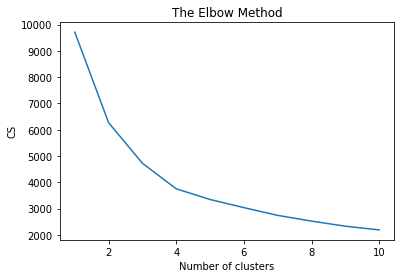

In [290]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()